# Cross Entropy, MLE, Logistic Regression, Computation Graph

In this tutorial, we explained the following concepts
1. Maximum Likelihood Estimation
2. Cross Entropy
3. Logistic Regression
4. Sigmoid function
5. Backpropagation


This tutorial is based on [Deep-Learning Andreas Gieger](https://www.youtube.com/watch?v=_Z50ROXYs6s&list=PL05umP7R6ij3NTWIdtMbfvX7Z-4WEXRqD&index=4)



## 1. $$ w = argmax_w P(\mathcal D ; w) $$
$w$ is our estimate that maximizes the likelihood of observing $\mathcal D$.




## 2. $$ w=argmax_{\mathbf{w}} \prod_{i=1}^n P(y_i, x_i;w)$$


$x_i\in \mathbb R$ ,$y_i \in {0,1}$

## 3. $$ w=argmax_{\mathbf{w}} \prod_{i=1}^n P(y_i | x_i;w) P(x_i;w)$$


## 4. $$ w=argmax_{\mathbf{w}} \prod_{i=1}^n P(y_i | x_i;w)$$


## 5. $$ w=argmax_{\mathbf{w}} \sum_{i=1}^n P(y_i | x_i;w)$$


## 6. $$ w=argmax_{\mathbf{w}} \sum_{i=1}^n log P(y_i | x_i;w)$$


## 7. $$ w=argmin_{\mathbf{w}} \sum_{i=1}^n -log P(y_i | x_i;w)$$


**Objective: Minimite the negative log likelihood function**

## 8. $$ w=argmin_{\mathbf{w}} \sum_{i=1}^n -log P(y_i | x_i;w)$$


**Insert model's assumption over labels** 

### Bernoulli Distribution $$ P(y | x;w)=\hat y^y (1 - \hat y)^{(1-y)},$$

where $\hat y = f_w (x)$


## 9. $$ w=argmin_{\mathbf{w}} \sum_{i=1}^n -log \big(\hat y^y (1 - \hat y)^{(1-y)} \big)$$



## 10. $$ w=argmin_{\mathbf{w}} \sum_{i=1}^n - y_i log\hat y - (1-y) log(1-\hat y)$$


**Binary Cross Entropy Loss function**

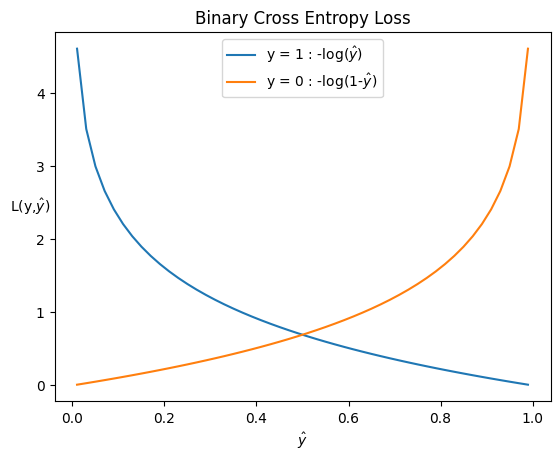

In [1]:
import numpy as np
import matplotlib.pyplot as plt
yhat=np.linspace(0.01,0.99,50)
plt.plot(yhat,-np.log(yhat),label =r'y = 1 : -log($\hat{y}$)')
plt.plot(yhat,-np.log(1-yhat),label=r'y = 0 : -log(1-$\hat y$)')
plt.ylabel(r'L(y,$\hat y$)',rotation=0)
plt.xlabel(r'$\hat y$')
plt.title('Binary Cross Entropy Loss')
plt.legend()
plt.show()

### 11. $$ w=argmin_{\mathbf{w}} \sum_{i=1}^n - y_i log \Big( \frac{1}{1+exp(-\mathbf{w}^T \mathbf{x} w_0)}\Big)  - (1-y_i) log \Big( 1- \frac{1}{1+exp(-\mathbf{w}^T \mathbf{x} + w_0)} \Big)$$


# Compute gradients w.r.r. $ \mathbf w , b$

## 1.  $$ \nabla_\mathbf{w} \mathcal L (\mathbf y , \mathbf X , \mathbf w , b)$$

## 2. $$ \nabla_\mathbf{w} \sum_i ^n \mathcal L (y_i , \mathbf{x}_i , \mathbf{w} , b)$$

## 3. $$ \sum_i ^n \mathcal \nabla_\mathbf{w} \mathcal L (y_i , \mathbf{x}_i , \mathbf{w} , b)$$

## 4. $$ \sum_i ^n \mathcal \nabla_\mathbf{w} ( -y_i log \Big( \frac{1}{1+exp(-\mathbf{w}^T \mathbf{x}_i w_0)}\Big)  - (1-y_i) log \Big( 1- \frac{1}{1+exp(-\mathbf{w}^T \mathbf{x}_i + w_0)} \Big) )$$

# Computation Graph 

Complex computations are decomposed into sequence of atomic computations.

## Forward
### 1. $$ u = \mathbf w \mathbf x_i +b $$
### 2. $$ \hat y_i = \frac{1}{1+exp(-u)}$$
### 3. $$ \mathcal L = -y_i log \hat y_i - (1-y_i) log (1-\hat y)$$



## Backward

### 3. $$ \frac{\partial \mathcal L}{\partial \hat y} = \frac{\hat y - y}{\hat y (1-\hat y)}$$

### 2. $$ \frac{\partial \mathcal L}{\partial u} = \frac{\partial \mathcal L}{\partial \hat y} \frac{\partial \hat y}{ \partial u} =  \frac{\hat{y} - y}{\hat{y} (1-\hat{y})} \times \Big( \frac{1}{1+exp(-u)} \times 1-\frac{1}{1+exp(-u)}  \Big)$$


### 1. $$ \frac{\partial \mathcal L}{\partial b} = \frac{\partial \mathcal L}{\partial u} \frac{\partial u}{\partial b} = \frac{\partial \mathcal L}{\partial u} $$


### 1. $$ \frac{\partial \mathcal L}{\partial \mathbf w} = \frac{\partial \mathcal L}{\partial u} \frac{\partial u}{\partial \mathbf w} = \frac{\partial \mathcal L}{\partial u} \times \mathbf x$$

# Chain Rule & Backpropagation


$$ \frac{d f(g(x)) }{dx} = \frac{d f}{dg} \frac{d g}{d x}$$

Multiply backpropgated gradients/global gradients with local gradients.



All incoming gradients must be summed up if fanout >1

In [2]:
class Sigmoid:
    def __init__(self):
        self.out=None
    def __call__(self,u):
        # For computational stability
        # bounded_u=np.maximum(-10, np.minimum(10,u))
        out=1/ (1+ np.exp(-u))
        self.out=out
        return out
    def backward(self,dout):
        return dout * (self.out * (1-self.out))

class BCE:
    def __init__(self):
        self.y,self.yhat=None,None
    def __call__(self,y,yhat):
        assert y.shape==yhat.shape
        assert y.shape[1]==1
        self.y=y
        self.yhat=yhat
        return -self.y * np.log(self.yhat) - (1 - self.y ) * np.log(1-self.yhat)

    def backward(self):
        return (self.yhat - self.y)/(self.yhat*(1-self.yhat))

class Layer:
    def __init__(self,input_dim,output_dim):
        self.w = np.random.randn(input_dim,output_dim)
        self.b=np.zeros(output_dim).reshape(1,output_dim)
        self.db=None
        self.dw=None
    def __call__(self,X):
        self.X=X
        return X@self.w + self.b
    
    def backward(self,ds):
        self.db = np.sum(ds,keepdims=True)
        self.dw = self.X.T @ ds 
        return ds @ self.w.T
    
    def update(self,lr=0.1):
        self.w -= lr* self.dw
        self.b -= lr*self.db    
    

# OR Problem

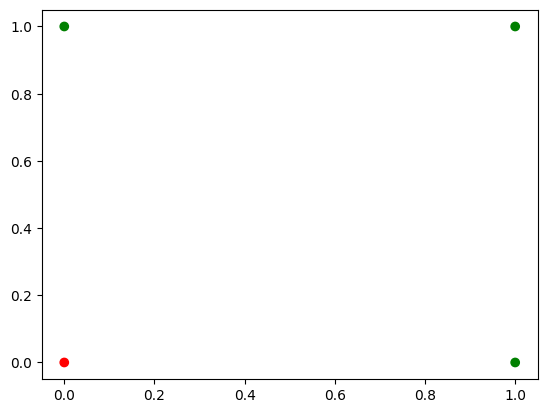

0.8648241101923153
0.023754192301749032
0.011708221745205496
0.007740492223531073
0.005774840179439331
0.004603092281990519
0.0038256630756435344
0.0032723998748468474
0.0028586666872566628
0.0025376427495530174


(array([[0.00506098],
        [0.99797632],
        [0.9979763 ],
        [0.99999998]]),
 array([[0],
        [1],
        [1],
        [1]]))

In [3]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,1]).reshape(len(X),1)
plt.scatter(X[:,0],X[:,1],c=['g' if i==1 else 'r' for i in y])
plt.show()

l1=Layer(input_dim=2,output_dim=1)
sigma=Sigmoid()
bce=BCE()


for i in range(10000):
    
    yhat = sigma(l1(X))
    loss = bce(y,yhat).mean()
    if i%1000==0:
        print(loss)    
 
    l1.backward(sigma.backward(bce.backward()))
    l1.update(0.1)
    
sigma(l1(X)),y

# AND Problem

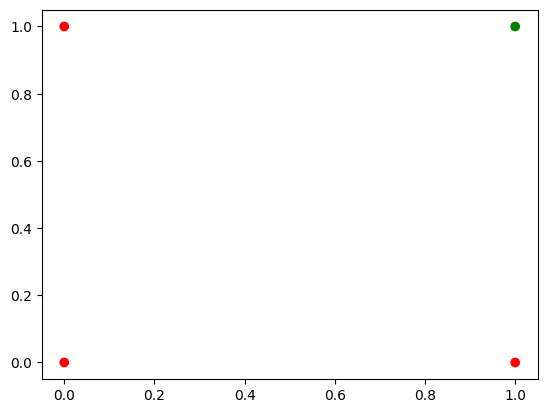

0.8666097299888866
0.04263800734096435
0.021690945469301132
0.01447307673679343
0.01084169224789841
0.008660692797456456
0.007207398783267394
0.0061703161007949005
0.005393335821620595
0.004789660418444149


(array([[1.83686188e-07],
        [5.05217619e-03],
        [5.05217620e-03],
        [9.92926452e-01]]),
 array([[0],
        [0],
        [0],
        [1]]))

In [4]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,0,0,1]).reshape(len(X),1)
plt.scatter(X[:,0],X[:,1],c=['g' if i==1 else 'r' for i in y])
plt.show()

l1=Layer(input_dim=2,output_dim=1)
sigma=Sigmoid()
bce=BCE()

for i in range(10000):
    
    yhat = sigma(l1(X))
    loss = bce(y,yhat).mean()
    if i%1000==0:
        print(loss)    
 
    l1.backward(sigma.backward(bce.backward()))
    l1.update(0.1)
    
sigma(l1(X)),y

# XOR Problem

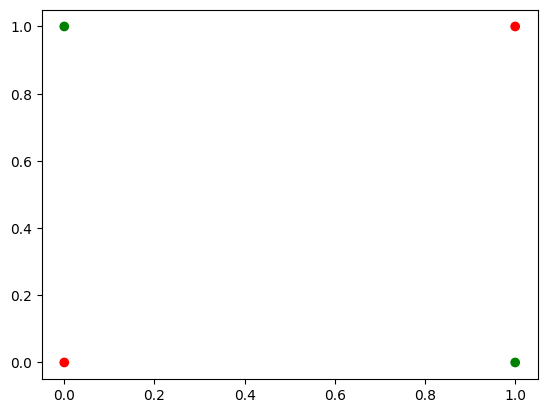

0.7384830039334104
0.6931471805599453
0.6931471805599454
0.6931471805599453
0.6931471805599453
0.6931471805599453
0.6931471805599453
0.6931471805599453
0.6931471805599453
0.6931471805599453


(array([[0.5],
        [0.5],
        [0.5],
        [0.5]]),
 array([[0],
        [1],
        [1],
        [0]]))

In [5]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,0]).reshape(len(X),1)
plt.scatter(X[:,0],X[:,1],c=['g' if i==1 else 'r' for i in y])
plt.show()

l1=Layer(input_dim=2,output_dim=1)
sigma=Sigmoid()
bce=BCE()

for i in range(10000):
    
    yhat = sigma(l1(X))
    loss = bce(y,yhat).mean()
    if i%1000==0:
        print(loss)    
 
    l1.backward(sigma.backward(bce.backward()))
    l1.update(0.1)
    
sigma(l1(X)),y

# Problem: LR can not solve nonlinear problems 

# 1. Solution: Non-linear Feature Generation

Non-linear features allow linear classifier to solve non-linear class. problems.

In [6]:
# Adding a non-linear feature => x1,x2,x1x2
X=np.array([[0,0,0],
   [0,1,0],
   [1,0,0],
   [1,1,1]])
y=np.array([0,1,1,0]).reshape(len(X),1)

l1=Layer(input_dim=3,output_dim=1)
sigma=Sigmoid()
bce=BCE()

for i in range(10000):
    
    yhat = sigma(l1(X))
    loss = bce(y,yhat).mean()
    if i%1000==0:
        print(loss)    
 
    l1.backward(sigma.backward(bce.backward()))
    l1.update(0.1)
    
sigma(l1(X)),y

0.9210141106390526
0.06905029965322482
0.03368003904306786
0.022107920141337056
0.016417675813098453
0.013044420110152777
0.010815637918006443
0.00923461986896935
0.008055368062192356
0.007142288495362558


(array([[0.00920898],
        [0.99386405],
        [0.99386405],
        [0.00408851]]),
 array([[0],
        [1],
        [1],
        [0]]))

# 2. Solution: Combining Multiple Logistic Regressions



**Multi-layer Perceptrons**

### The XOR  Problem ####

| x1   x2 |XOR(x1,x2)|
|---------|---------:|
| 0     0 |    0     |
| 0     1 |    1     |
| 1     0 |    1     |
| 1     1 |    1     |




## $$ \text{XOR}(x_1,x_2) = \text{AND}( \text{OR}(x_1,x_2), \text{NAND}(x_1,x_2))$$

This expression can be rewritten as a program of logistic regressors


### $$h_1 = \sigma(\mathbf w_\text{OR} ^T \mathbf x + w_\text{OR} )$$
### $$h_2 = \sigma(\mathbf w_\text{NAND} ^T \mathbf x + w_\text{NAND} )$$

### $$\hat y = \sigma(\mathbf w_\text{AND} \mathbf h + w_\text{AND} )$$

$\mathbf h$ is a non-linear representation of $\mathbf x$
### Combine: $$ \mathbf h =\sigma \Bigg( \begin{bmatrix} \mathbf w_\text{OR} \\ \mathbf w_\text{NAND}\end{bmatrix} \mathbf x + \begin{bmatrix}  w_\text{OR} \\ w_\text{NAND}\end{bmatrix}\Bigg)$$

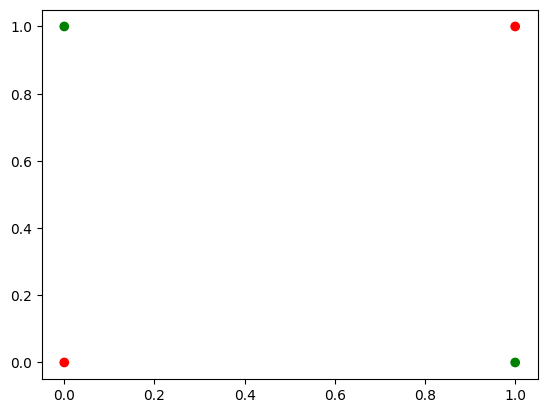

0.6997722180917505
0.1243773999505944
0.02200942662238593
0.011570899888490908
0.0077931269578129635
0.005859675831360415
0.004688882344485362
0.003905173461798449
0.00334437829616088
0.0029235038470899555


(array([[0.00249966],
        [0.99658623],
        [0.99769316],
        [0.00215033]]),
 array([[0],
        [1],
        [1],
        [0]]))

In [7]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,0]).reshape(len(X),1)
plt.scatter(X[:,0],X[:,1],c=['g' if i==1 else 'r' for i in y])
plt.show()

h1=Layer(input_dim=2,output_dim=1)
h2=Layer(input_dim=2,output_dim=1)
h3=Layer(input_dim=2,output_dim=1)


sigma1=Sigmoid()
sigma2=Sigmoid()
sigma3=Sigmoid()

bce=BCE()

for i in range(10000):
    out_h1=sigma1(h1(X))
    out_h2=sigma2(h2(X))
    bold_h=np.hstack((out_h1,out_h2))
    yhat=sigma3(h3(bold_h))
    loss = bce(y,yhat).mean()
    if i%1000==0:
        print(loss)    
    dl_bold_h=h3.backward(sigma3.backward(bce.backward()))
    h1.backward(sigma1.backward(dl_bold_h[:,0][:,np.newaxis]))
    h2.backward(sigma2.backward(dl_bold_h[:,1][:,np.newaxis]))
    
    h1.update(0.1)
    h2.update(0.1)
    h3.update(0.1)

sigma3(h3(np.hstack((sigma1(h1(X)),sigma2(h2(X)))))),y

# A Multi-layer Perceptron in Simple Numpy

In [8]:
def g(x):
    return 1 / (1+np.exp(-x))

def bce_loss(y,yhat):
    loss=np.mean(-y * np.log(yhat) - (1 - y ) * np.log(1-yhat))
    dl_dyhat=(yhat - y)/(yhat*(1-yhat))
    return loss,dl_dyhat

def mlp(X,y,lr=0.001,loss=bce_loss,hidden_size=50):
    nx,dx=X.shape
    ny,dy=y.shape
    assert nx==ny

    w=np.random.randn(dx,hidden_size)
    h=np.random.randn(hidden_size,dy)
    
    for epoch in range(10000):
        # (1) Forward
        gx = g(X @ w)
        yhat= g(gx @ h)
        # (2) Cross Entropy Loss
        loss,dl_dyhat=bce_loss(y,yhat)
        
        # (3) Backward
        dl_g2 = dl_dyhat * (yhat * (1-yhat))
        dl_dh = gx.T @ dl_g2
        dl_dgx = dl_g2 @ h.T
        dl_dw = X.T @ (dl_dgx * (gx * (1-gx)))
        
        # (4) Update
        w -= lr * dl_dw
        h -= lr * dl_dh
        
    return np.round(yhat)

    
X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]])

print("OR:\n",mlp(X,np.array([[0], [1], [1], [1]])))
print("AND:\n",mlp(X,np.array([[0], [0], [0], [1]])))
print("XOR:\n",mlp(X,np.array([[0], [1], [1], [0]])))
print("NAND:\n",mlp(X,np.array([[1], [1], [1], [0]])))

OR:
 [[0.]
 [1.]
 [1.]
 [1.]]
AND:
 [[0.]
 [0.]
 [0.]
 [1.]]
XOR:
 [[0.]
 [1.]
 [1.]
 [0.]]
NAND:
 [[1.]
 [1.]
 [1.]
 [0.]]


In [9]:
# It is beutiful, isn't it :) ?